In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler

In [16]:
df=pd.read_csv("https://raw.githubusercontent.com/digipodium/Datasets/main/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [17]:
px.scatter(df,x='Age',y='EstimatedSalary',color='Purchased',symbol='Purchased')

<AxesSubplot:>

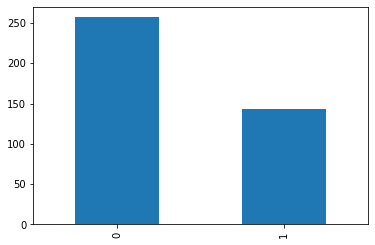

In [18]:
df.Purchased.value_counts().plot(kind='bar')

In [19]:
X=df[['Age','EstimatedSalary']]
y=df['Purchased']
scaler=StandardScaler()
scaledX=scaler.fit_transform(X)
xtrain,xtest,ytrain,ytest=train_test_split(scaledX,y,test_size=.2)
xtrain.shape,xtest.shape
    

((320, 2), (80, 2))

In [20]:
m=KNeighborsClassifier()
m.fit(xtrain,ytrain)

KNeighborsClassifier()

In [21]:
m.score(xtest,ytest)#you should not see the score like this , we use other stuff

0.925

In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [23]:
ypred=m.predict(xtest)

In [24]:
import seaborn as sns

In [25]:
cm=confusion_matrix(ytest,ypred)
print(cm)

[[49  4]
 [ 2 25]]


In [26]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        53
           1       0.86      0.93      0.89        27

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



In [27]:
from matplotlib.colors import ListedColormap
import numpy as np

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


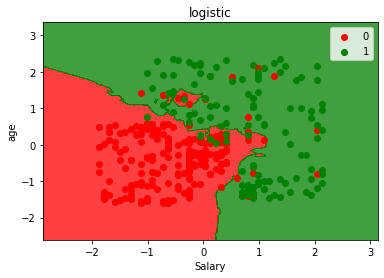

In [28]:
from utils import plot_area_distribution
plot_area_distribution(m,xtrain,ytrain,'logistic','Salary','age')